In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 6.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2935 sha256=099898da57e8333b4a8252adc275d6b56ac76cc79d1997bf890a7c7051b61992
  Stored in directory: /home/sam/.cache/pip/wheels/c5/88/35/cc8a1e198b27a1d3d9d3f9b30090b9d5531778847835472ec4
Successfully built sklearn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = [["Positive", "I love this product"],
        ["Negative", "I hate this product"],
        ["Positive", "It's amazing"],
        ["Negative", "It's terrible"],
        ["Positive", "I highly recommend it"],
        ["Negative", "I wouldn't recommend it"],
        ["Neutral", "It's okay"]]
df = pd.DataFrame(data, columns=["Sentiment", "Text"])

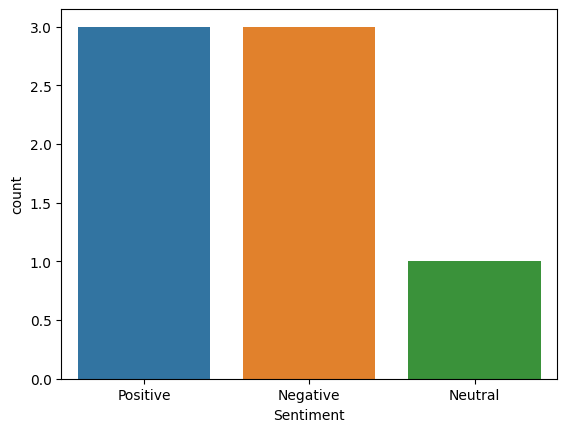

In [4]:
sns.countplot(x='Sentiment', data=df)
plt.show()

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words("english"))
def remove_stopwords(text):
        word_tokens = word_tokenize(text)
        filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
        return " ".join(filtered_text)

df['Text'] = df['Text'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package punkt to /home/sam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sam/nltk_data...


In [7]:
sentiment = SentimentIntensityAnalyzer()
def get_sentiment(text):
        score = sentiment.polarity_scores(text)
        if score['compound'] >= 0.05:
                return "Positive"
        elif score['compound'] <= -0.05:
                return "Negative"
        else:
                return "Neutral"

df['Prediction'] = df['Text'].apply(lambda x: get_sentiment(x))

In [8]:
print(confusion_matrix(df['Sentiment'], df['Prediction']))
print(classification_report(df['Sentiment'], df['Prediction']))

[[3 0 0]
 [0 0 1]
 [0 0 3]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         3
     Neutral       0.00      0.00      0.00         1
    Positive       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.58      0.67      0.62         7
weighted avg       0.75      0.86      0.80         7



/home/sam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


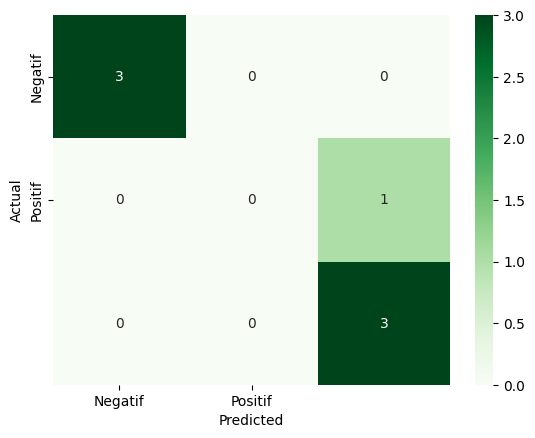

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(df['Sentiment'], df['Prediction'])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# class_rep classification_report(df['Sentiment'], df['Prediction'], labels=[0,1,2])

class_rep = classification_report(df['Sentiment'], df['Prediction'], target_names=['Negatif', 'Positif', 'Neutral'])

print(class_rep)



# buatkan x_test yang berisi data teks
x_test = ["I love this product", "I hate this product", "It's amazing", "It's terrible", "I highly recommend it", "I wouldn't recommend it", "It's okay"]

# buat model menggunakan regresi logistik
X_train = df['Text']
y_train = df['Sentiment']

model = LogisticRegression()
model.fit(X_train, y_train)

# lakukan prediksi
y_pred = model.predict(x_test)

# tampilkan hasil prediksi
print(y_pred)

/home/sam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sam/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Negatif       1.00      1.00      1.00         3
     Positif       0.00      0.00      0.00         1
     Neutral       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.58      0.67      0.62         7
weighted avg       0.75      0.86      0.80         7



ValueError: could not convert string to float: 'love product'

ValueError: could not convert string to float: 'love product'